In [22]:
help(glm)

# Regresiones para Respuestas Discretas
En esta sesión vamos a analizar una generalización del modelo de regresion lineal que permite modelar un conjunto de datos,  en que la variable a explicar es discreta y las variables explicativas son numéricas o categóricas. Dos ejemplos de ello son los  modelos de regresión logística y regresión de Poisson, que estimaremos en R con ayuda de la función `glm`.


## 1. Regresión Logística
En este caso la variable a explicar es **binaria** y las variables explicativas son numéricas o categóricas. 

### Formalmente hablando

Sea $y \in \{0,1\}$ la variable a explicar y $\textbf{x} \in \mathbb{R}^k$ las variables explicativas.

Dos cambios respecto de la regresión lineal: 

- El primero es que $y |\textbf{x}$ se modela como una v.a. con distribución $\textbf{Bernoulli}$ en lugar de una Normal, es decir:

$$p(y |\textbf{x},\beta)= Ber(\mu(\textbf{x}))$$

dónde $$\mathbb{E}[y|\textbf{x}] = p(y=1|\textbf{x}) = \mu(\textbf{x})$$

- Y lo segundo es que, al igual que en la regresión lineal, se considera una combinación lineal de las variables explicativas, pero esta combinación lineal es pasada como parámetro a una función $\mu$ que toma valores en el intervalo $[0,1]$, de manera que:

$$\mu(x) = \sigma(\beta^T\textbf{x})$$

dónde $\sigma$ es la función sigmoidal definida por:

$$\sigma(\eta) = \frac{1}{1+exp(-\eta)} = \frac{e^{\eta}}{e^{\eta}+1}$$

y su inversa conocida también como $\textbf{logística}$ o $\textbf{logit}$ es: 

$$\text{logit}(p) = ln\left(\frac{p}{1- p}\right)$$

entonces se cumple que 

$$ \text{logit}(\mu(\textbf{x}))= \text{logit}(\sigma(\beta^T\textbf{x})) = \beta^T\textbf{x}$$

Asi, se obtiene el modelo:



$$\text{logit}(\mathbb{E}[y|\textbf{x}]) = \beta^T\textbf{x}$$

denominado regresión logística, por su similitud con la regresión lineal, aunque es una forma de clasificación mas que una regresión.

El coeficiente $\frac{p}{1-p}$ se denomina suele denominar riesgo (odd en inglés) pues es la tasa entre las probabilidades de respuesta "positiva" y "negativa".


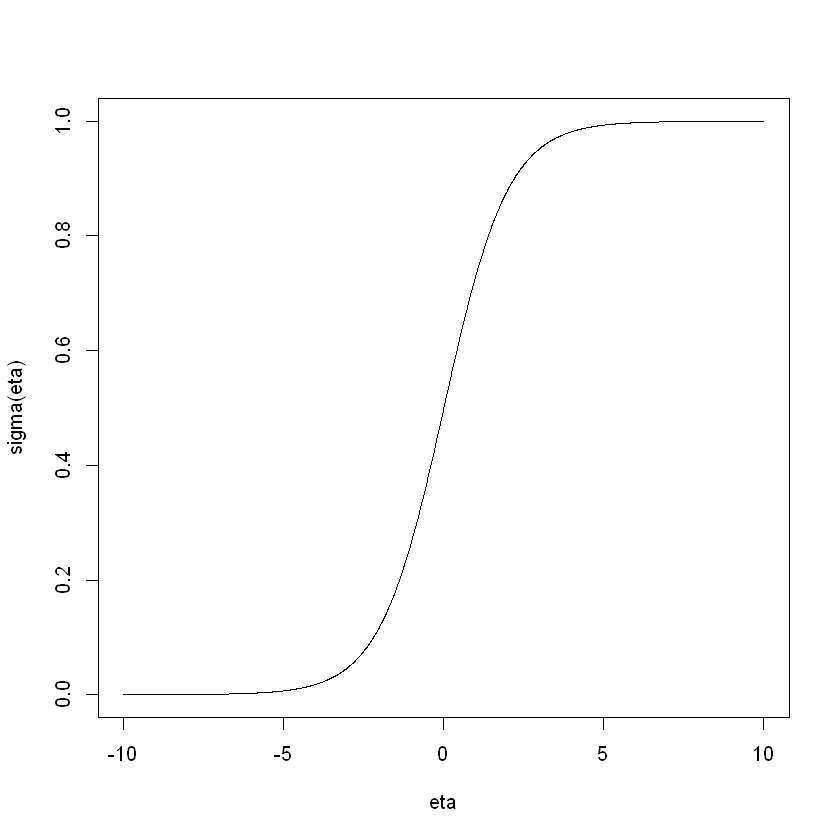

In [23]:
#gráfica de la función sigmoide
eta = seq(-10,10,by=0.01)
sigma <- function(x){return( exp(x)/(exp(x)+1))}
plot(eta,sigma(eta),type="l")


### Estimación de parámetros $\beta$
Los parámetros $\beta$ se pueden estimar por máxima verosimilitud.
En efecto, sea la muestra $\{(y_i,\textbf{x}_i), i=1,\cdots,n\}$, se tiene:

$$\begin{array}{lll}
\log \mathcal{L} (\beta) & = &  {\displaystyle \sum_{i=1}^n} y_i \log \sigma(\beta^T \textbf{x}_i) + {\displaystyle \sum_{i=1}^n}  (1-y_i) \log (1- \sigma(\beta^T \textbf{x}_i))\\
&  = &{\displaystyle \sum_{i=1}^n} y_i \log \left(\frac{\sigma(\beta^T \textbf{x}_i)}{1- \sigma(\beta^T \textbf{x}_i)}\right) + {\displaystyle \sum_{i=1}^n}  \log (1- \sigma(\beta^T \textbf{x}_i))\\
& = & {\displaystyle \sum_{i=1}^n}  y_i \beta^T \textbf{x}_i + {\displaystyle \sum_{i=1}^n}  \log (1- e^{\beta^T \textbf{x}_i})
\end{array}$$

A partir de esta función de verosimilitud no es posible obtener de manera analítica los  estimadores máximo verosímiles de $\beta$. Se requiere utilizar algún algoritmo de aproximación como Newton-Raphson para las raices del gradiente de $\log \mathcal{L}(\beta)$ o utilizar directamente el algoritmo del gradiente descendente. 

En el caso de Newton-Raphson las ecuaciones de aproximación quedan:
$$\hat{\beta}^{nuevo} = \hat{\beta}^{viejo} + (X^TW X)^{-1}X^T(\textbf{y} - \hat{\mu})$$

donde $X \in M_{nxk}$ es la matriz de valores de las $k$ variables explicativas en las $n$ observaciones, 

$$\hat{\mu}_i = \frac{e^{X_{i}\hat{\beta}^{viejo}}}{e^{X_{i}\beta^{viejo}}+1}$$

y $W \in M_{nxn}$ es la matriz diagonal con:

$$ w_{ii} = \hat{\mu}_i ( 1- \hat{\mu}_i)$$

Lo criterios de convergencia del método iterativo utilizado para estimar los parámetros pueden ser varios, pero en todos ellos la idea subyacente es que $\hat{\beta}^{nuevo} \approx \hat{\beta}^{viejo}$ o $\,\log \mathcal{L}(\hat{\beta}^{viejo}) \approx log \mathcal{L} (\hat{\beta}^{nuevo})$ o $\,\hat{\mu}^{viejo} \approx \hat{\mu}^{nuevo}$. 

In [24]:
#Ejemplo de regresión logística para datos SAT
datos <- read.csv("datosSAT.csv",header=TRUE,sep=";")
summary(datos)
#TrLevel es el nivel alcanzado: 1 si pasó el curso 0 si no
#SAT es el puntaje obtenido en el test de Lenguaje
res<- glm(TrLevel ~ SAT, data=datos,family = binomial(link = "logit"))
summary(res)

    TrLevel         SAT       
 Min.   :0.0   Min.   :463.0  
 1st Qu.:0.0   1st Qu.:543.5  
 Median :1.0   Median :567.5  
 Mean   :0.7   Mean   :559.5  
 3rd Qu.:1.0   3rd Qu.:582.0  
 Max.   :1.0   Max.   :649.0  


Call:
glm(formula = TrLevel ~ SAT, family = binomial(link = "logit"), 
    data = datos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2918  -0.1830   0.3662   0.5057   1.5301  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -31.65827   12.69071  -2.495   0.0126 *
SAT           0.05878    0.02296   2.560   0.0105 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 36.652  on 29  degrees of freedom
Residual deviance: 21.993  on 28  degrees of freedom
AIC: 25.993

Number of Fisher Scoring iterations: 5


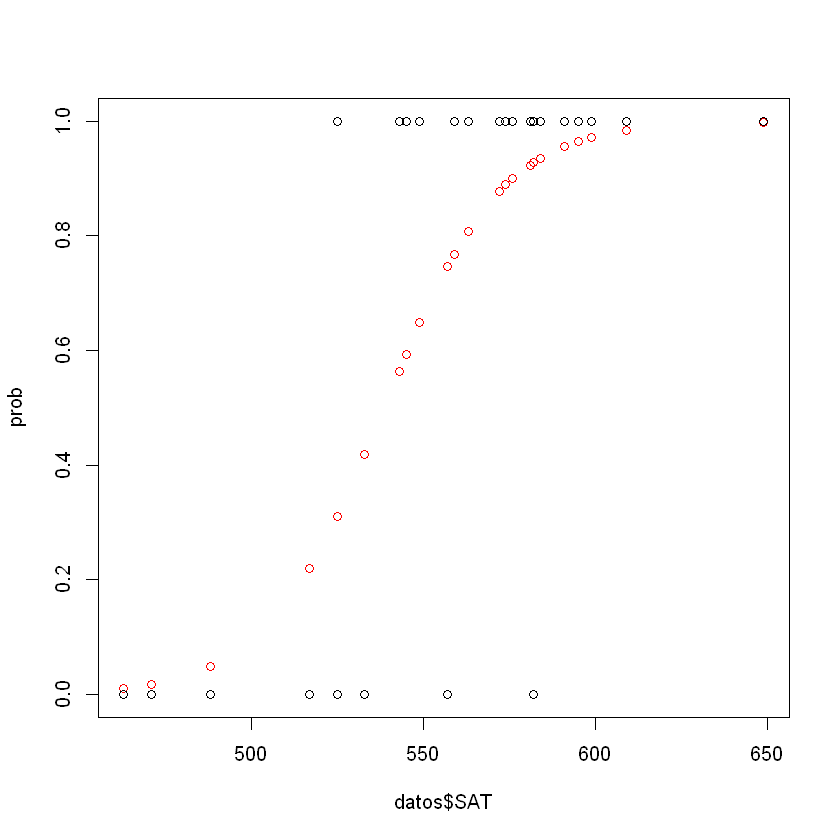

In [25]:
#graficamos los resultados
dat <-cbind(rep(1,30),datos$SAT)
prob <- sigma(dat%*%res$coefficients)
plot(datos$SAT,prob,col="red",ylim=c(0,1))
points(datos$SAT,datos$TrLevel)

**Ejercicio 1:**

a) Interprete los resultados

b) Indage en la función glm el método de estimación del modelo logit que utiliza y los principales parámetros disponibles.

c) Describa formalmente el método de estimación del modelo logit que usa glm y haga una comparación con los otros métodos disponibles. Para ello use como referencia el Cap. 8 de "Machine Learning, a Probabilistic Perspective", K. Murphy.

In [26]:
#Ejemplo de regresión logística para datos de PSU de estudiantes de primer año universitario
#y su relación con la estrategia de aprendizaje Elaborativa del estudiante (0, bajo nivel - 1 normal o alto nivel)
#obtenida en un test de diagnóstico
datos <- read.csv("datosEjemplo.csv",header=TRUE,sep=";")
datos

Elaborativo,MAT,LENG,CIENCIA
<int>,<int>,<int>,<int>
0,429,573,443
0,572,534,497
1,631,692,611
0,713,654,694
1,591,523,537
0,610,530,558
1,619,628,409
0,596,628,625
1,644,466,523


**Ejercicio 2:**

a) Ajuste un modelo logit a estos datos. Interprete sus resultados.

b) Escoja la variable explicativa con mayor correlación con la variable binaria y rehaga los cálculos. Grafique e interprete sus resultados.

c) Investigue estrategias para comparar los modelos en (a) y (b). Concluya


## 2. Regresión de Poisson
En este caso la variable a explicar es **discreta**, mas precisamente es una variable de conteo o a valores en $\it N$  y las variables explicativas son numéricas o categóricas. 

### Formalmente hablando

Sea $y \in \{0,1,2, \cdots\}$ la variable a explicar y $\textbf{x} \in \mathbb{R}^n$ las variables explicativas.
 

Entonces $y\mid \textbf{x}$ se modela como una v.a. con distribución $\textbf{Poisson}$, es decir:

$$p(y |\textbf{x},\beta)= Poisson(\lambda(\textbf{x},\beta))$$

dónde, al igual que en la regresión lineal, se considera una combinación lineal de las variables explicativas, pero esta combinación lineal es pasada como parámetro a una función $ \lambda$ que toma valores positivos:

$$\lambda(\textbf{x},\beta) = \lambda_{\textbf{x},\beta}=e^{\beta^T\textbf{x}}$$

Así, 
$$p(y |\textbf{x},\beta) = p(y | \lambda_{\textbf{x},\beta}) = \frac{\lambda_{\textbf{x},\beta}^{y}}{y!} \exp \left ({-\lambda_{\textbf{x},\beta}} \right) = 
\frac{e^{y \beta^T\textbf{x}}}{y!} \exp \left (-e^{\beta^T\textbf{x}} \right)$$



Notar que en este caso, se tiene:

$$\log E(Y \mid \textbf{x}) = \log \lambda_{\textbf{x}} = \beta^T \textbf{x}$$

### Estimación de parámetros $\beta$
Los parámetros $\beta$ se pueden estimar por máxima verosimilitud.
En efecto, sea la muestra $\{(y_i,\textbf{x}_i), i=1,\cdots,n\}$, se tiene:

$$
\log \mathcal{L} (\beta) =   {\displaystyle \sum_{i=1}^n}\left (y_i \beta^T \textbf{x}_i +   e^{\beta^T \textbf{x}_i} + \log(y_i!)\right)$$

A partir de esta función de verosimilitud no es posible obtener de manera analítica los  estimadores máximo verosímiles de $\beta$. Utilizando Newton-Raphson para aproximar las raices del gradiente de $\log \mathcal{L}(\beta)$ se obtiene:
$$\hat{\beta}^{nuevo} = \hat{\beta}^{viejo} + (X^TW X)^{-1}X^T(\textbf{y} - \hat{\lambda})$$

donde $X \in M_{nxk}$ es la matriz de valores de las $k$ variables explicativas en las $n$ observaciones, 

$$\hat{\lambda}_i = e^{X_{i}\beta^{viejo}}$$

y $W \in M_{nxn}$ es la matriz diagonal con:

$$ w_{ii} = \hat{\lambda}_i$$

Lo criterios de convergencia del método iterativo utilizado para estimar los parámetros pueden ser varios, pero en todos ellos la idea subyacente es que $\hat{\beta}^{nuevo} \approx \hat{\beta}^{viejo}$ o $\,\log \mathcal{L}(\hat{\beta}^{viejo}) \approx log \mathcal{L} (\hat{\beta}^{nuevo})$ o $\,\hat{\lambda}^{viejo} \approx \hat{\lambda}^{nuevo}$. 

In [27]:
#ejemplo de regresión de Poisson que considera datos simulados sobre 200 estudiantes de EM
#la variable a explicar es el número de premios obtenidos y las variables explicativas
#son sus puntajes en el examen final de matemáticas, y el tipo de programa en que 
#están matriculados: general, vocacional o académico.
require(ggplot2)

p <- read.csv("https://stats.idre.ucla.edu/stat/data/poisson_sim.csv")
p <- within(p, {
  prog <- factor(prog, levels=1:3, labels=c("General", "Academic", 
                                                     "Vocational"))
  id <- factor(id)
})
print(p[1:20,])
summary(p)

    id num_awards       prog math
1   45          0 Vocational   41
2  108          0    General   41
3   15          0 Vocational   44
4   67          0 Vocational   42
5  153          0 Vocational   40
6   51          0    General   42
7  164          0 Vocational   46
8  133          0 Vocational   40
9    2          0 Vocational   33
10  53          0 Vocational   46
11   1          0 Vocational   40
12 128          0   Academic   38
13  16          0 Vocational   44
14 106          0 Vocational   37
15  89          0 Vocational   40
16 134          0    General   39
17  19          0    General   43
18 145          0 Vocational   38
19  11          0   Academic   45
20 117          0 Vocational   39


       id        num_awards           prog          math      
 1      :  1   Min.   :0.00   General   : 45   Min.   :33.00  
 2      :  1   1st Qu.:0.00   Academic  :105   1st Qu.:45.00  
 3      :  1   Median :0.00   Vocational: 50   Median :52.00  
 4      :  1   Mean   :0.63                    Mean   :52.65  
 5      :  1   3rd Qu.:1.00                    3rd Qu.:59.00  
 6      :  1   Max.   :6.00                    Max.   :75.00  
 (Other):194                                                  

In [10]:
with(p, tapply(num_awards, prog, function(x) {
  sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))

General               Academic             Vocational 
"M (SD) = 0.20 (0.40)" "M (SD) = 1.00 (1.28)" "M (SD) = 0.24 (0.52)"

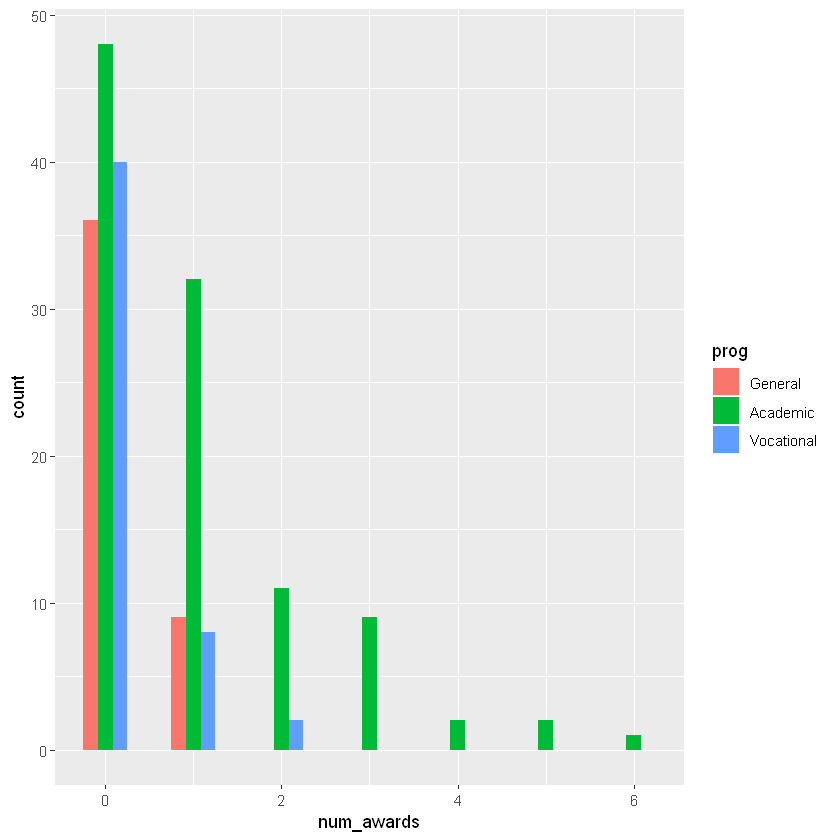

In [11]:
ggplot(p, aes(num_awards, fill = prog)) +
  geom_histogram(binwidth=.5, position="dodge")

In [12]:
summary(m1 <- glm(num_awards ~ prog + math, family="poisson", data=p))


Call:
glm(formula = num_awards ~ prog + math, family = "poisson", data = p)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2043  -0.8436  -0.5106   0.2558   2.6796  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -5.24712    0.65845  -7.969 1.60e-15 ***
progAcademic    1.08386    0.35825   3.025  0.00248 ** 
progVocational  0.36981    0.44107   0.838  0.40179    
math            0.07015    0.01060   6.619 3.63e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 287.67  on 199  degrees of freedom
Residual deviance: 189.45  on 196  degrees of freedom
AIC: 373.5

Number of Fisher Scoring iterations: 6


In [14]:
with(m1, cbind(res.deviance = deviance, df = df.residual,
  p = pchisq(deviance, df.residual, lower.tail=FALSE)))

res.deviance,df,p
189.4496,196,0.6182274


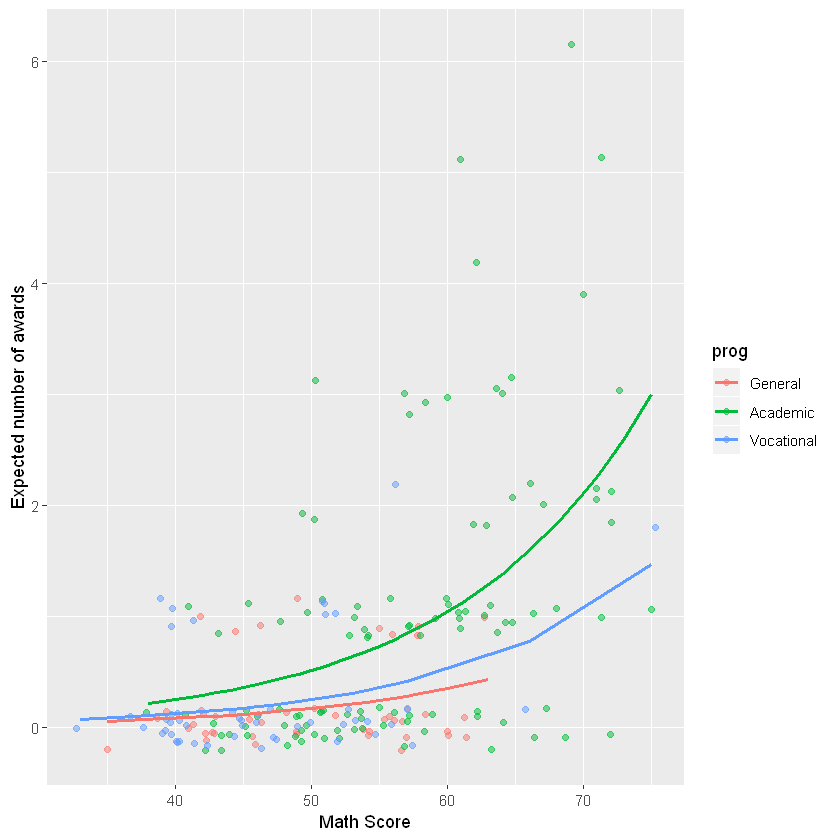

In [13]:
## calculate and store predicted values
p$phat <- predict(m1, type="response")

## order by program and then by math
p <- p[with(p, order(prog, math)), ]

## create the plot
ggplot(p, aes(x = math, y = phat, colour = prog)) +
  geom_point(aes(y = num_awards), alpha=.5, position=position_jitter(h=.2)) +
  geom_line(size = 1) +
  labs(x = "Math Score", y = "Expected number of awards")

**Ejercicio 3:**

a) Interprete los resultados de este análisis
b) Rehaga sus cálculos considerando una variable explicativa a la vez. Interprete sus resultados.
c) Investigue estrategias para comparar los modelos en (a) y (b). Concluya.